<a href="https://colab.research.google.com/github/HemanthBodduboinagithub/ML--usecases-/blob/main/Detecting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello world')

hello world


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

data = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x78d0488f1d80>,
 'caps': [<matplotlib.lines.Line2D at 0x78d0488f22c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78d0488f1a80>],
 'medians': [<matplotlib.lines.Line2D at 0x78d0488f2800>],
 'fliers': [<matplotlib.lines.Line2D at 0x78d0488f2aa0>],
 'means': []}

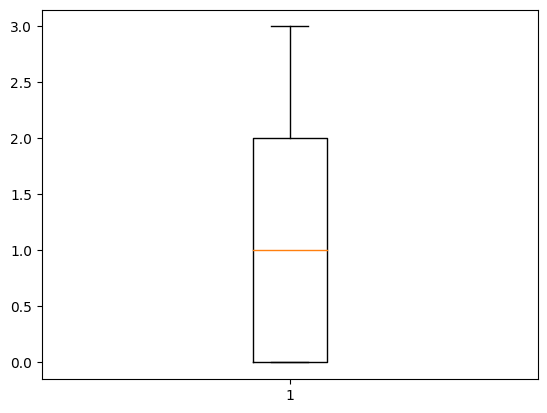

In [ ]:
plt.boxplot(df['cp'])

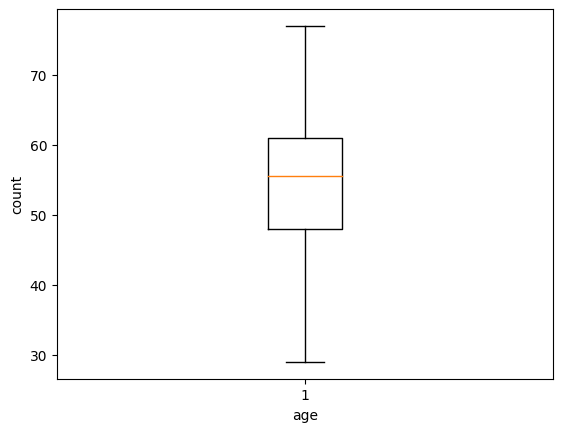

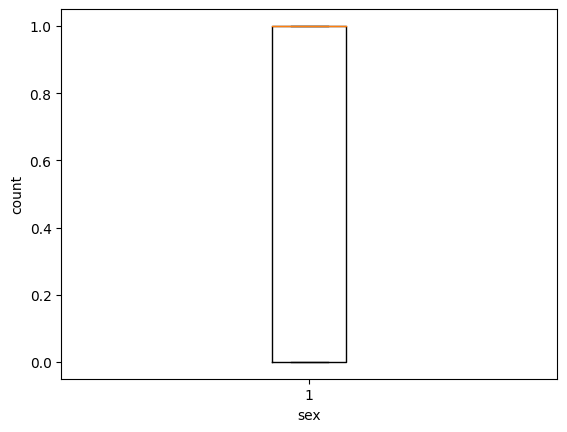

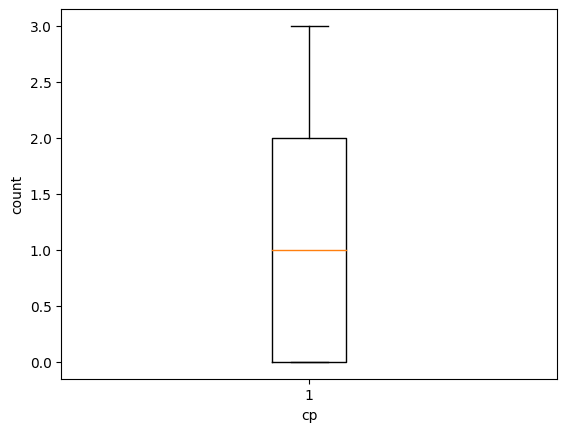

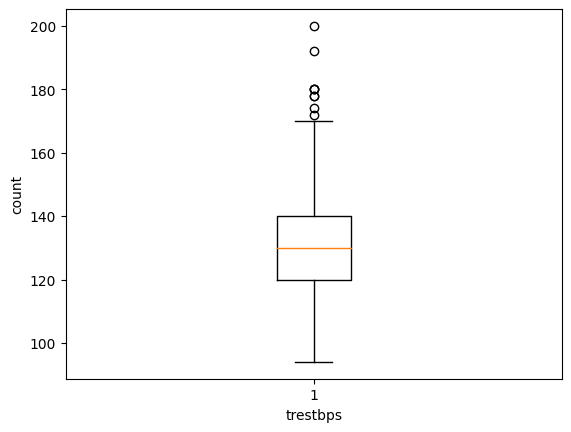

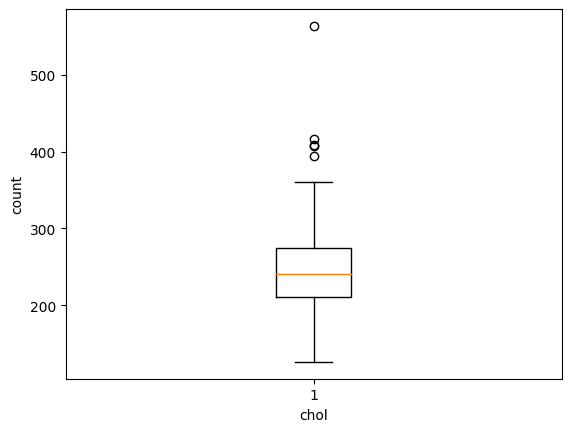

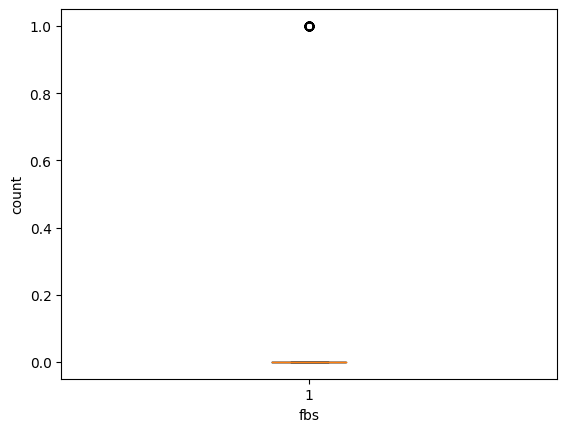

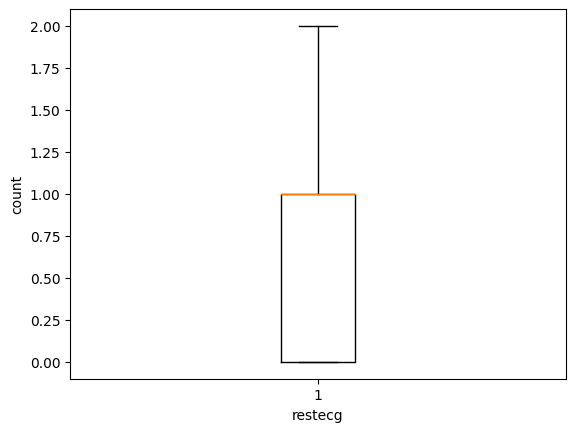

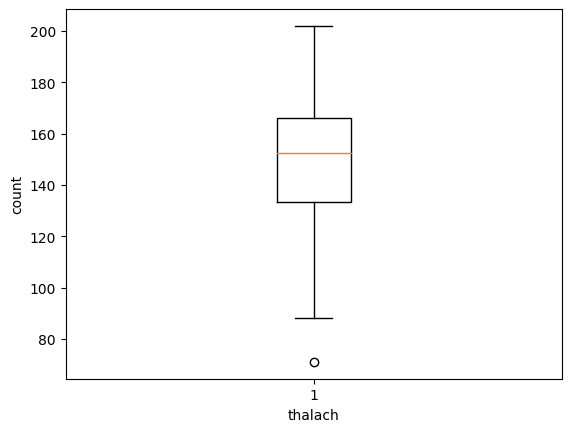

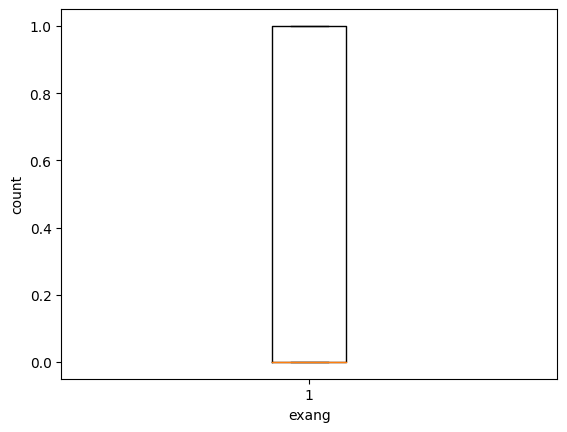

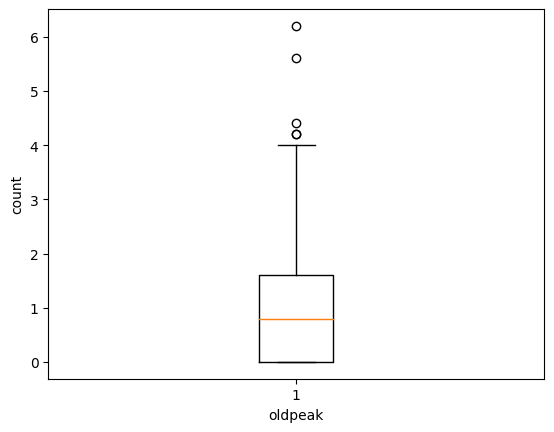

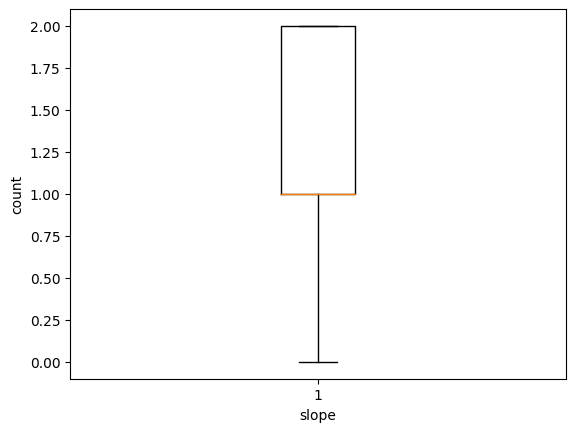

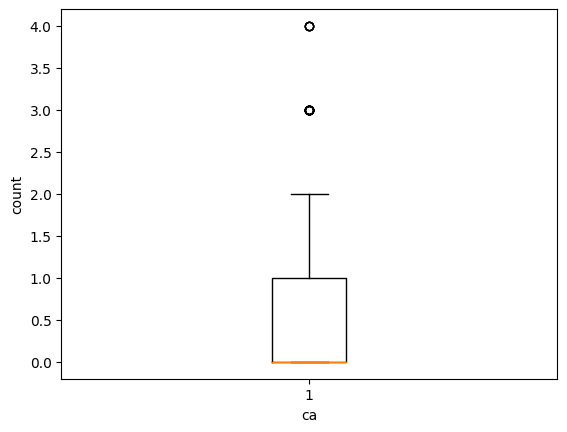

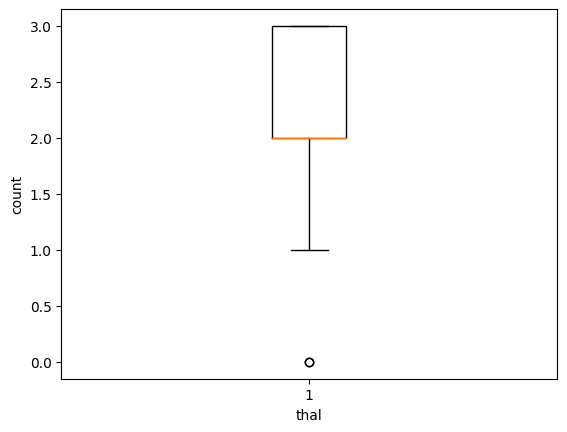

In [ ]:
for i in df.columns:
  if ((df[i].dtype != "object") & (i != "target")):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()


In [ ]:
out_col = ["trestbps","thalach","oldpeak","chol"]

# chol - outlier removal

#Q1 = df['chol'].quantile(0.25)
#Q3 = df['cho'].quantile(0.75)

#IQR = q3-q1

#lower = Q1-1.5*IQR
#upper = Q3+1.5*IQR


 #df = [(df['chol']<=upper) & (df['chol']>lower)]

In [ ]:
for i in out_col:
   Q1 = df[i].quantile(0.25)
   Q3 = df[i].quantile(0.75)
   IQR = Q3-Q1

   lower = Q1-1.5*IQR
   upper = Q3+1.5*IQR
   df =df[(df[i]<=upper) & (df[i]>lower)]

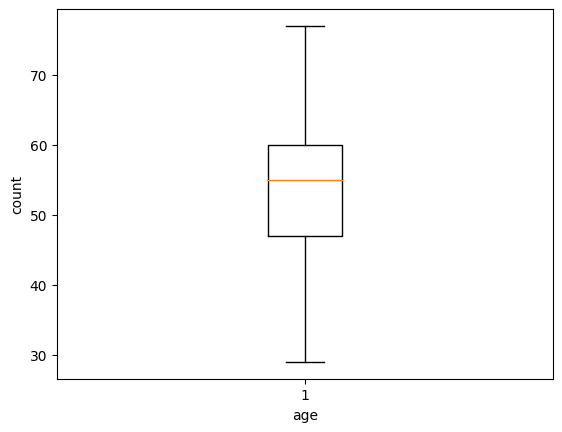

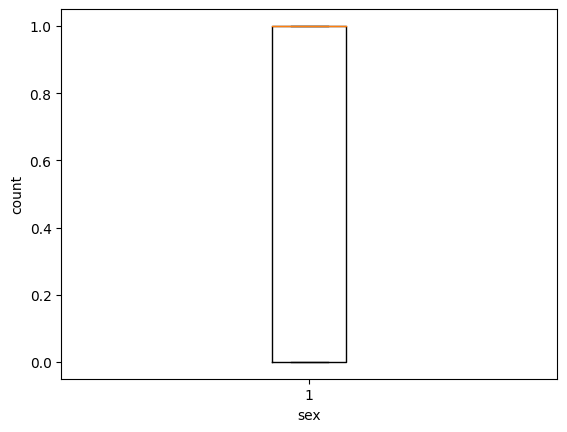

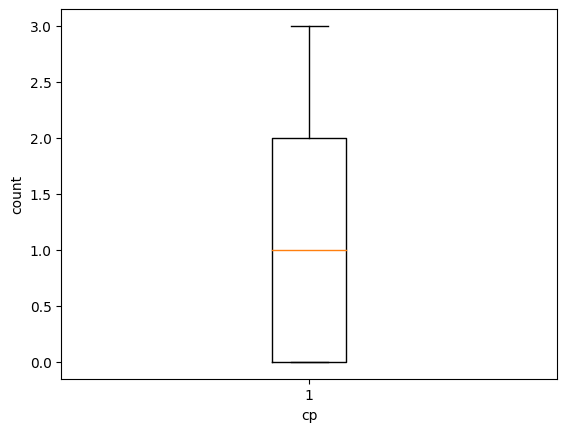

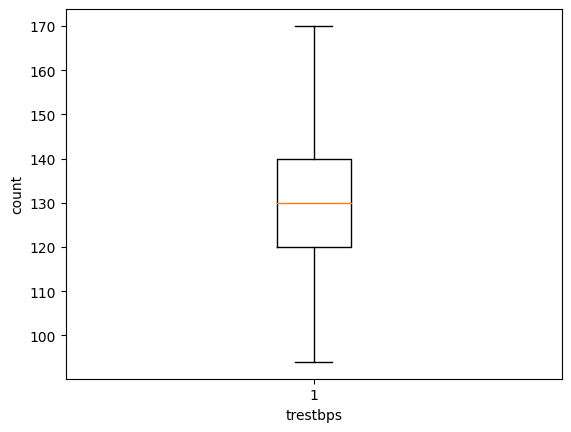

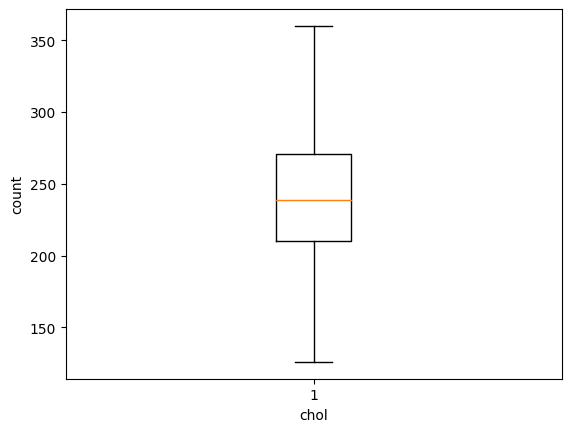

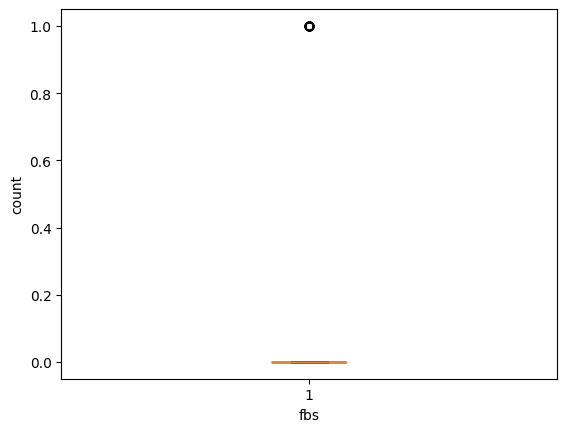

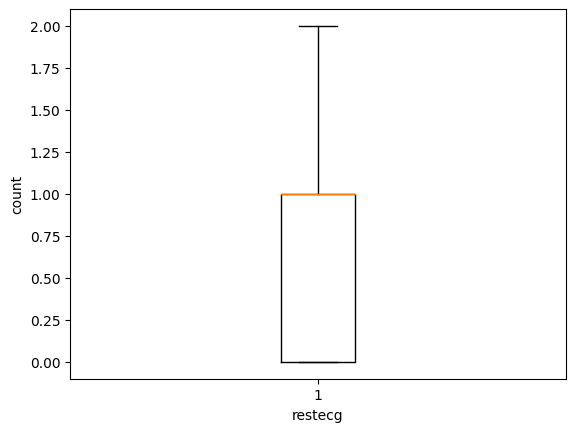

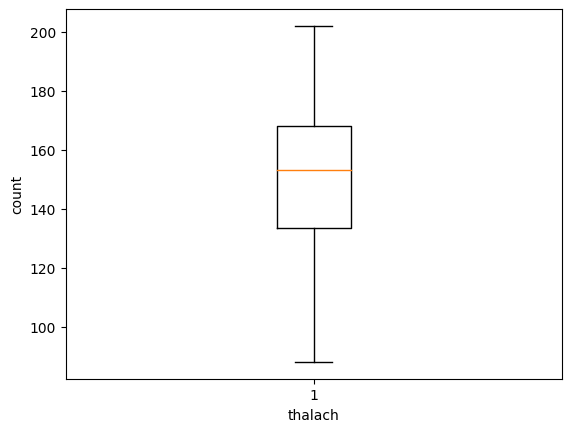

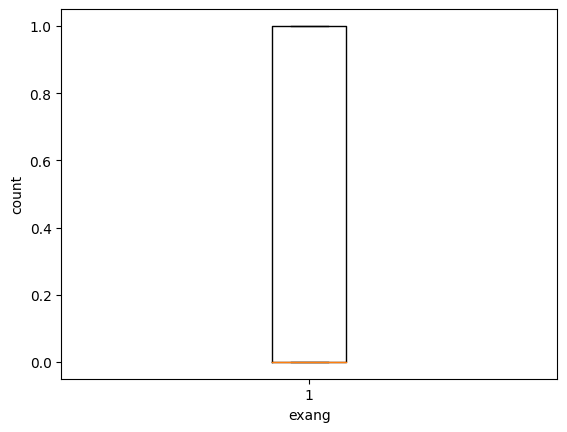

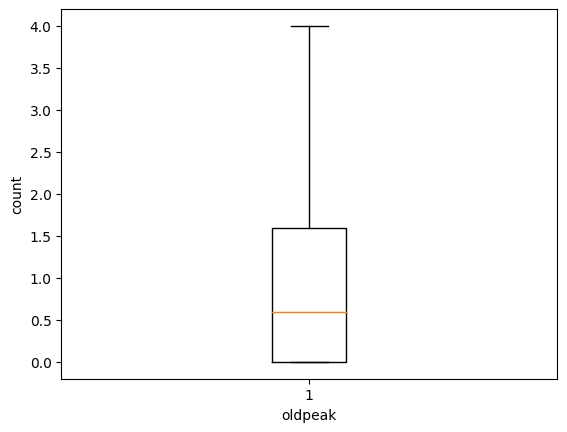

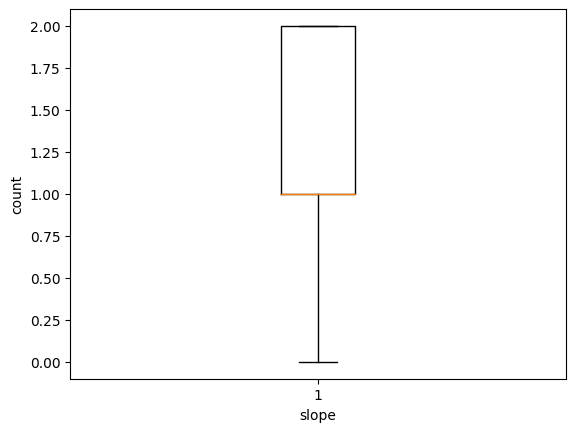

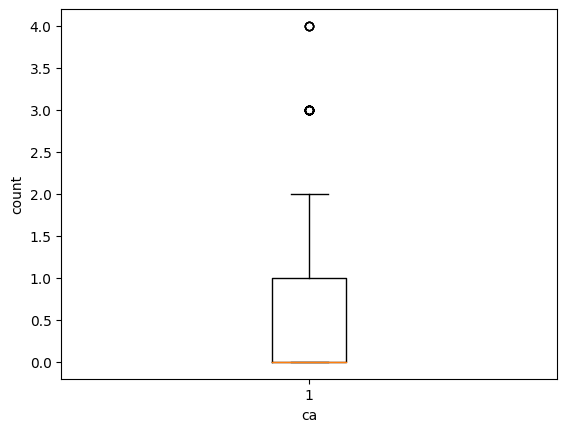

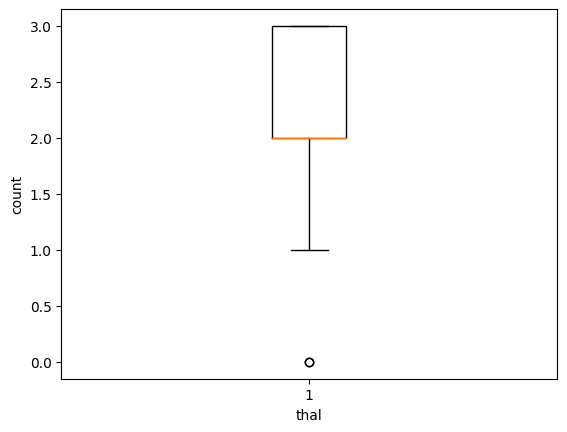

In [ ]:
for i in df.columns:
  if ((df[i].dtype != "object") & (i != "target")):
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()


In [ ]:
# model building i,e to divide into dependent and independt
x = df.iloc[:, :-1]
y = df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 283, dtype: int64

In [ ]:
# spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2


In [ ]:
y_train

293    0
150    1
11     1
98     1
83     1
      ..
278    0
136    1
257    0
271    0
161    1
Name: target, Length: 198, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
y_test.head()

80     1
300    0
296    0
230    0
267    0
Name: target, dtype: int64

In [ ]:
y_test

80     1
300    0
296    0
230    0
267    0
      ..
233    0
53     1
91     1
131    1
157    1
Name: target, Length: 85, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, pair_confusion_matrix
accuracy_score(y_pred,y_test)

0.7764705882352941

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[32, 13],
       [ 6, 34]])

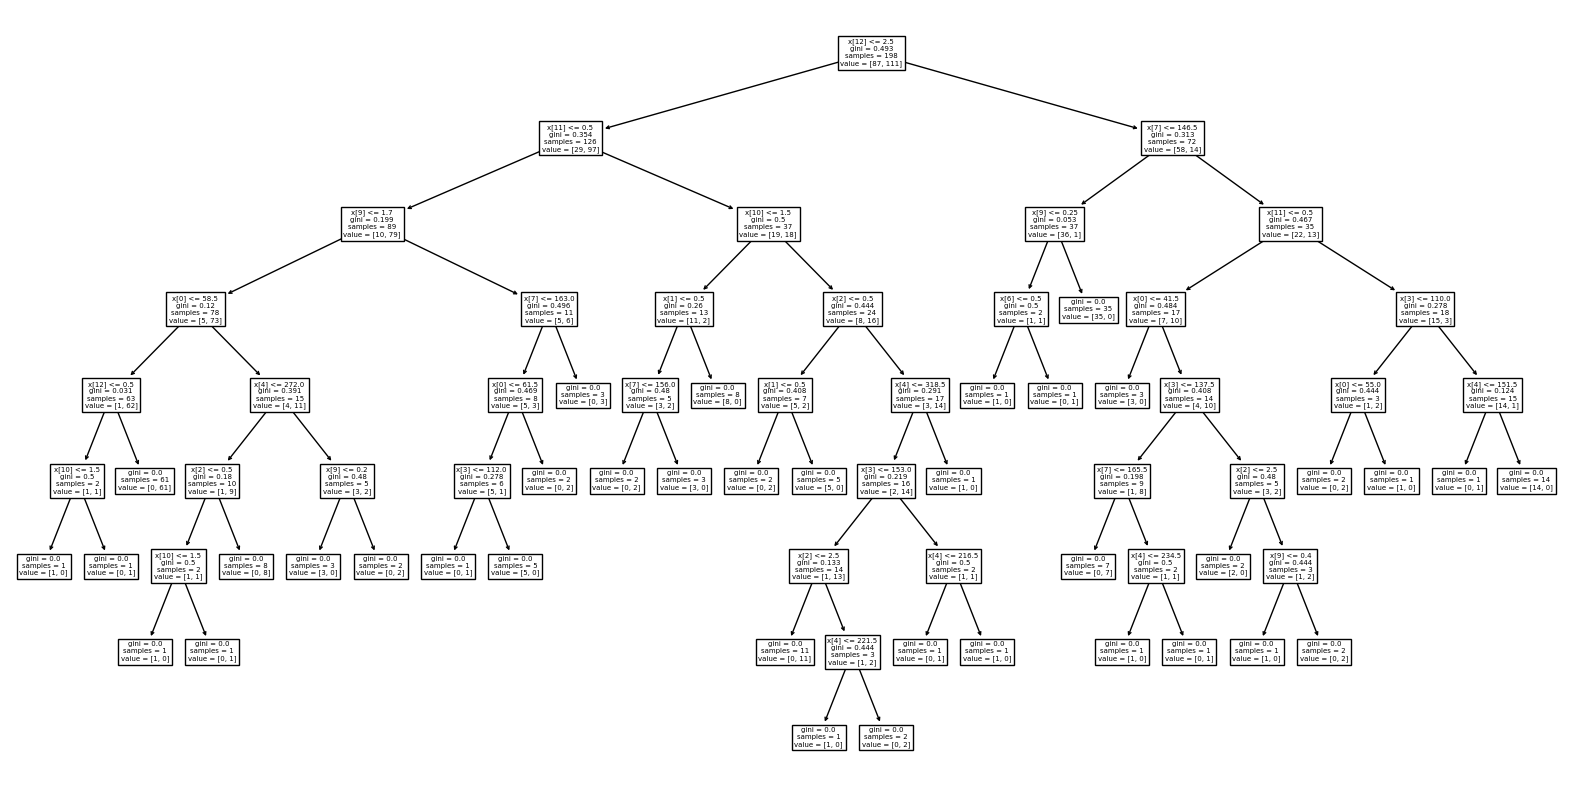

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt)
plt.show()
plt.savefig('decision_tree.png')

In [ ]:
# hyperparameter tuning refers to the process of selecting optimal values for the hyperparameters of a machine learning model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None,5,10],
    'min_sample_split' : [2,5,10],
    'min_sample_leaf' : [1,2,4]
    }

dt = DecisionTreeClassifier()
# perform grid search with cross validation
grid_search = GridSearchCV(dt, param_grid, cv=5)

In [ ]:
best_params = grid_search.best_params_
best_dt = grid_search.best_estimator_
print(best_params)
print(best_dt)



AttributeError: ignored